## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import numpy as np
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

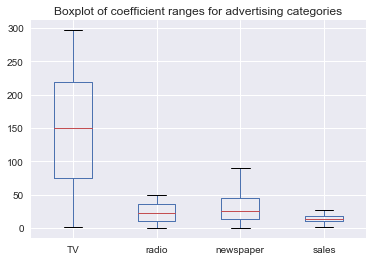

In [3]:
#create boxplot of coefficient ranges
df.boxplot()
plt.title('Boxplot of coefficient ranges for advertising categories')
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

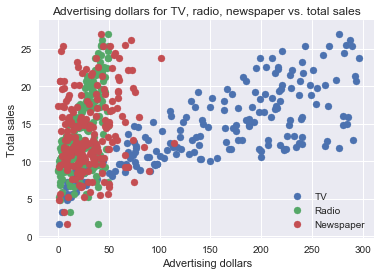

In [4]:
#scatter each advertising category against sales
plt.scatter(df[['TV']], df[['sales']], label='TV')
plt.scatter(df[['radio']], df[['sales']], label='Radio')
plt.scatter(df[['newspaper']], df[['sales']], label='Newspaper')
plt.legend()

plt.xlabel('Advertising dollars')
plt.ylabel('Total sales')
plt.title('Advertising dollars for TV, radio, newspaper vs. total sales')

In [5]:
from pandas.tools.plotting import scatter_matrix 

/Users/kathyli/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


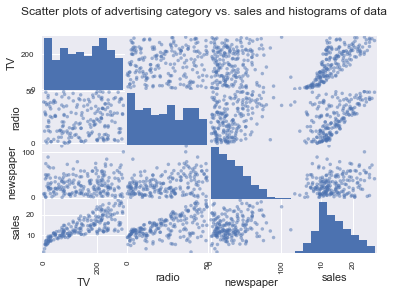

In [6]:
#create scatter matrix, including histograms of data as well as advertising category vs. sales scatter plots
scatter_matrix(df)
plt.suptitle('Scatter plots of advertising category vs. sales and histograms of data')

Which of the variables seem correlated with one another? Which don't? Explain your answer

It seems like of newspaper, radio, and TV, TV is most positively correlated with sales, whereas newspaper is the least correlated (i.e., no clear trend). TV appears to be positive correlated with sales, as indicated by the upward trend of the dots; radio also seems positively correlated with sales but with a less-clear trend; and newspaper seems to have no clear relationship with sales. One way to interpret this is that people that watch a TV ad are more likely to purchase that product, whereas those that read a newspaper ad are not as likely to be purchasers (or, simply that people who read newspapers pay less attention to ads, or that print mediums have lower readership/viewership than digital mediums). As expected, TV/radio/newspaper do not appear to be correlated with one another; this is because we would not expect the amount of advertising dollars we spend on one category to necessarily affect how much we spend on another (i.e., we expect that the variables are independent). 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [7]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [8]:
y = df[['sales']]

b) Set X to be just the features described above in df

In [9]:
X = df[['TV', 'radio', 'newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [10]:
from sklearn.model_selection import train_test_split

#use train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

d) Train model on training data, and make predictions on testing data

In [11]:
#train model 
regr = LinearRegression()
regr.fit(X_train, y_train)

#make predictions on testing
predictions_test = regr.predict(X_test)

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [12]:
import sklearn
#compute R^2
sklearn.metrics.r2_score(y_test, predictions_test)

0.90955506009040521

Our $R^2$ value is ~0.9, which is good - this means that our predictions are closely matched up with our actual values ($R^2 = 1$ means that they are perfectly matched up, and $R^2 = 0$ means that the fit is the same as if we just drew a horizontal line).

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

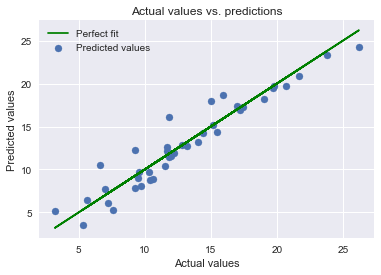

In [13]:
#plot predictions vs actual values
plt.scatter(y_test, predictions_test, label='Predicted values')

#plot perfect fit line (1 to 1, x=y)
plt.plot(y_test, y_test, color = 'green', label='Perfect fit')
plt.title('Actual values vs. predictions')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

This looks like a good model - we see that our predicted values match to the actual values pretty well, and that the residuals appear to fall within a reasonable band.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [14]:
#find coefficients for linear regression
regr.coef_

#result: sales = ~0.046*TV + ~0.189*radio - ~0.0011*newspaper

array([[ 0.04629706,  0.18884254, -0.00107495]])

In [15]:
#check cross-correlation 
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


By looking at the coefficients of our linear regression, we can gain a sense of which advertising spend categories represent the strongest relationship with resulting sales - in this case, it appears that radio and TV have a stronger correlation than newspaper (with radio being the strongest). In particular, it seems that radio and TV advertising spend are positively correlated with sales, while newspaper advertising spend is slightly negatively correlated. Something that we should check is that the variables are in fact independent, as we assume them to be (i.e., not correlated) - we do a preliminary check by looking at cross-correlation between TV, radio, newspaper, and sales, and see that newspaper and radio appear to be highly correlated.

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From g), we can conclude that TV and radio are the stronger indicators of sales than newspaper (as seen from the magnitude of the coefficients on each feature). As stated above, in particular, it seems that radio and TV advertising spend are positively correlated with sales, while newspaper advertising spend is slightly negatively correlated. In addition to checking for dependencies between variables, we also need to standardize the data to have mean 0 and variance 1 (as stated in the lecture slides) to ensure that the feature importance isn't skewed by differences in the distribution of each feature. When we do this (as seen below), we see that the TV feature actually has the largest magnitude coefficient associated with it (~0.76) versus radio (~0.54), and newspaper still has the smallest magnitude coefficient (~-0.0045). 

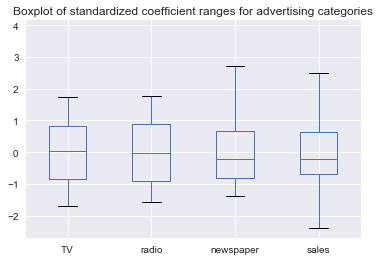

0.90955506009


array([[ 0.76182684,  0.53737086, -0.00448702]])

In [16]:
#use standardized data and try again - can also use standard scaler from sklearn
#standardize data
standardized_df = pd.DataFrame()
standardized_df[['TV']] = (df[['TV']] - np.mean(df[['TV']]))/np.std(df[['TV']])
standardized_df[['radio']] = (df[['radio']] - np.mean(df[['radio']]))/np.std(df[['radio']])
standardized_df[['newspaper']] = (df[['newspaper']] - np.mean(df[['newspaper']]))/np.std(df[['newspaper']])
standardized_df[['sales']] = (df[['sales']] - np.mean(df[['sales']]))/np.std(df[['sales']])

#create boxplot of standardized coefficient ranges
standardized_df.boxplot()
plt.title('Boxplot of standardized coefficient ranges for advertising categories')
plt.show()

y_std = standardized_df[['sales']]
X_std = standardized_df[['TV', 'radio', 'newspaper']]

#split into test/train
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2, random_state=7)

#train model 
regr_std = LinearRegression()
regr_std.fit(X_train, y_train)

#make predictions on testing
predictions_test = regr_std.predict(X_test)

import sklearn
print(sklearn.metrics.r2_score(y_test, predictions_test))

regr_std.coef_

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

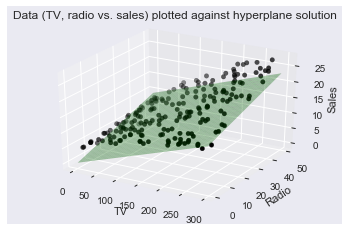

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot hyperplane solution
TV_vals = np.linspace(min(X[['TV']].values), max(X[['TV']].values),100)
radio_vals = np.linspace(min(X[['radio']].values), max(X[['radio']].values),100)
X_mesh, Y_mesh = np.meshgrid(TV_vals, radio_vals)

prediction = lambda TV, radio: regr.coef_[0][0]*TV + regr.coef_[0][1]*radio
prediction_vals = prediction(X_mesh,Y_mesh)
ax.plot_surface(X_mesh, Y_mesh, prediction_vals, color='green', alpha=0.35, label='Hyperplane solution')

#scatter TV, radio, sales in 3D (ignore newspaper)
ax.scatter(X[['TV']].values.flatten(), X[['radio']].values.flatten(),y.values.flatten(), color='black', label='Data')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('Data (TV, radio vs. sales) plotted against hyperplane solution')
ax.dist = 11

In [18]:
#try nonlinear model - include interaction term
X_new = X.copy()
X_new['TVxradio'] = X.TV*X.radio

df_new = X_new.copy()
df_new[['sales']] = y

#(another option for shuffling data is df_new = df_new.sample(frac=1, replace=False))
nonlin_y = df_new[['sales']]
nonlin_X = df_new[['TV', 'radio', 'TVxradio']]

#split into test and train
X_train, X_test, y_train, y_test = train_test_split(nonlin_X, nonlin_y, test_size=0.2, random_state=7)

#train model 
regr_nonlin = LinearRegression()
regr_nonlin.fit(X_train, y_train)

#make predictions on testing
predictions_test = regr_nonlin.predict(X_test)

import sklearn
print(sklearn.metrics.r2_score(y_test, predictions_test))

regr_nonlin.coef_

0.958858207467


array([[ 0.01751581,  0.02078879,  0.00113167]])

We see that some of the data points are above and below the hyperplane solution (i.e., a plane doesn't fit well to all the data). Thus, we can improve this by including a nonlinear term - in this case, we include an interaction term, TV x radio. We implement this in the code block above and see that we have improved our $R^2$ to ~0.96 from ~0.9. Thus, our new nonlinear model fits the data better than our original linear one.

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


112.64705664288809

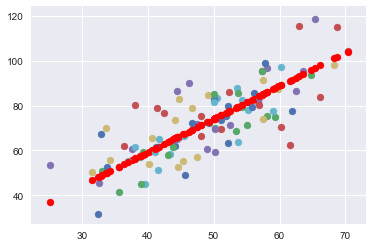

In [19]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate, show=True):
    points = genfromtxt("data.csv", delimiter=",")
    #points = genfromtxt("../data/data.csv", delimiter=",")
    #learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    if show==True:
        print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
        
        for i in range(0,len(points)):
            plt.scatter(points[i,0],points[i,1])
            plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    return compute_error_for_line_given_points(b, m, points)
run(100, 0.0001)

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 0 iterations b = 0, m = 0, error = 5565.10783448


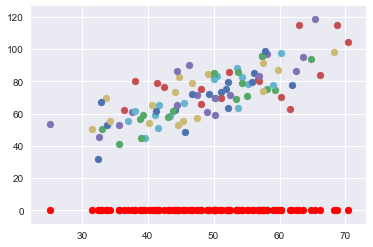

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 1 iterations b = 0.0145470101107, m = 0.737070297359, error = 1484.58655741


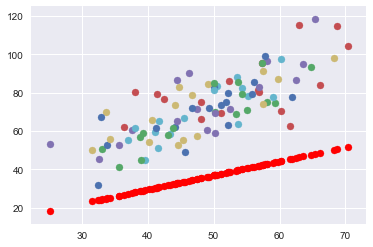

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 2 iterations b = 0.0218739629596, m = 1.10679545435, error = 457.854257574


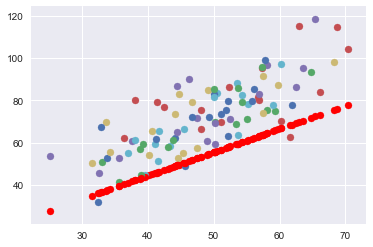

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 3 iterations b = 0.0255792243213, m = 1.29225466491, error = 199.509985726


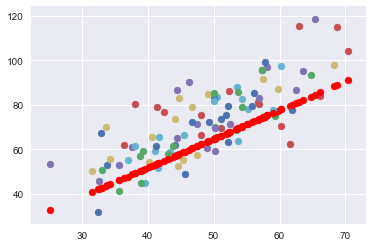

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 4 iterations b = 0.0274677895591, m = 1.38528325565, error = 134.505910582


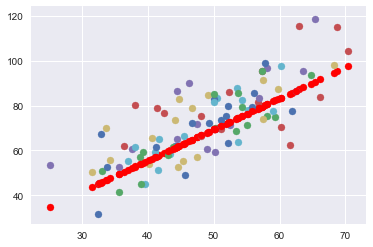

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 5 iterations b = 0.0284450719817, m = 1.43194723238, error = 118.149693422


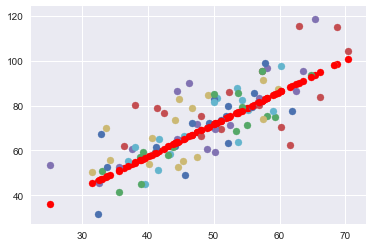

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 6 iterations b = 0.0289652407665, m = 1.4553540089, error = 114.03414906


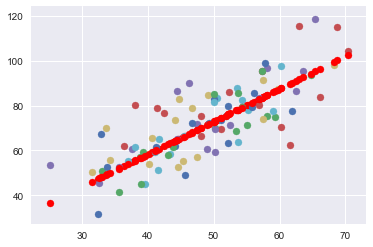

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 7 iterations b = 0.029256114126, m = 1.46709461772, error = 112.998577317


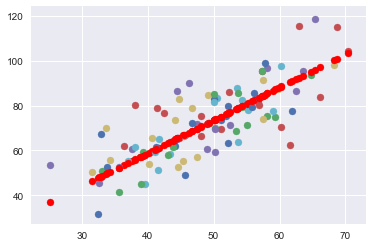

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 8 iterations b = 0.0294319691638, m = 1.47298329822, error = 112.737981876


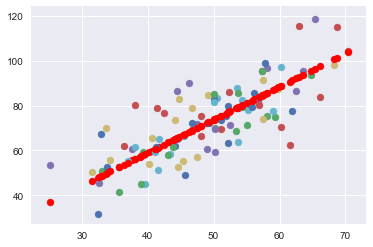

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 9 iterations b = 0.0295501290244, m = 1.4759365619, error = 112.672384359


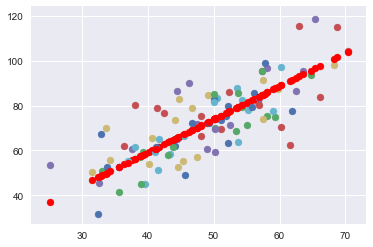

In [20]:
# Use this to visually discuss convergence rate based on learning rate

#change number of iterations 
for num in range(0,10):
    run(num, 0.0001)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = 0.00142263881364, m = 0.0720757556366, error = 5046.60226938


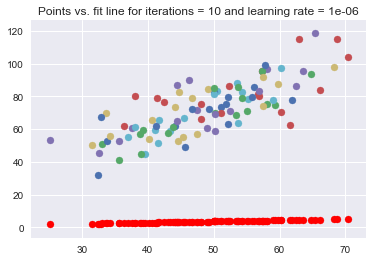

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 50 iterations b = 0.00645562838764, m = 0.326922872367, error = 3420.95439624


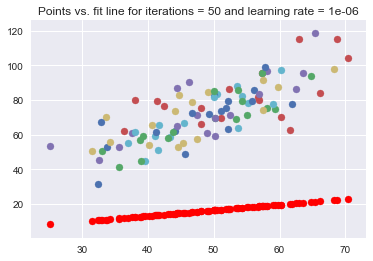

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0114908471126, m = 0.581577539775, error = 2119.97931737


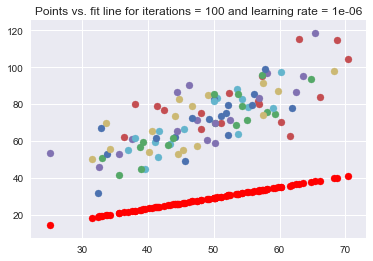

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = 0.0116942888741, m = 0.591928335746, error = 2073.93753013


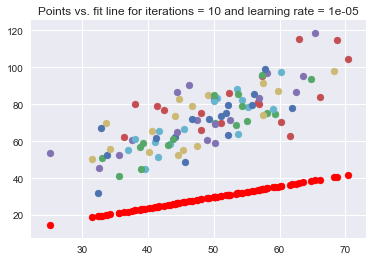

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 50 iterations b = 0.0271124951517, m = 1.36414787004, error = 145.485453278


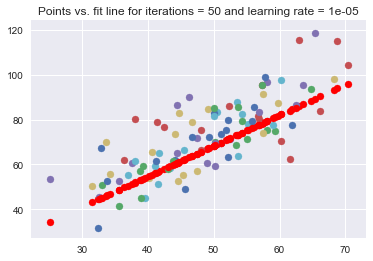

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0294936154471, m = 1.47000284261, error = 112.848039257


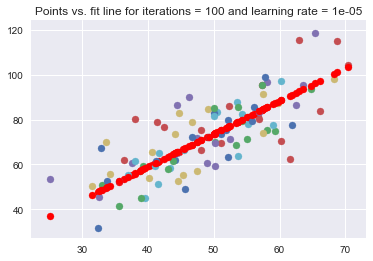

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = 0.0296393478747, m = 1.47741737555, error = 112.655851815


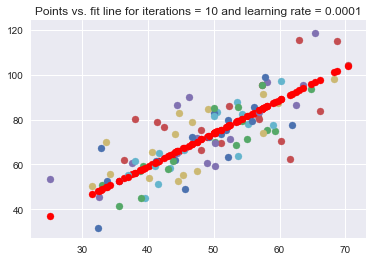

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 50 iterations b = 0.0320719207993, m = 1.47886174156, error = 112.648860994


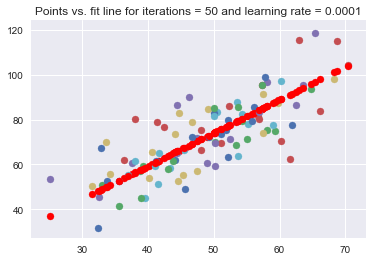

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = 0.0350749705923, m = 1.47880271753, error = 112.647056643


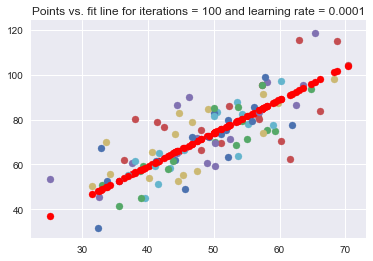

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = -29270.9696986, m = -1489261.22965, error = 5.52898058937e+15


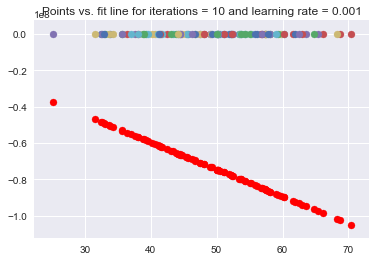

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 50 iterations b = -3.0098387958e+28, m = -1.53135866421e+30, error = 5.84596587358e+63


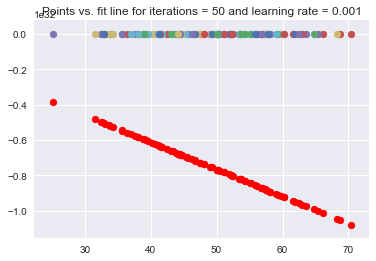

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = -3.11655820625e+58, m = -1.58565582261e+60, error = 6.26787445431e+123


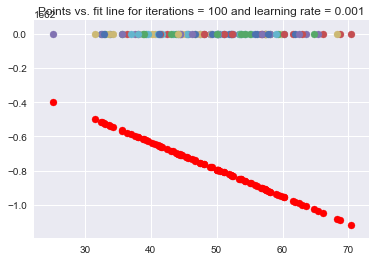

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = -2.24404541052e+15, m = -1.14173502816e+17, error = 3.2496237962e+37


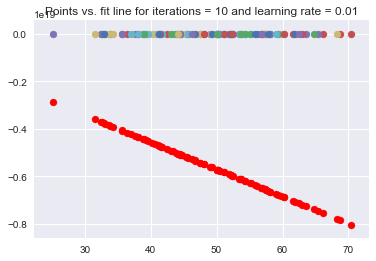

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 50 iterations b = -7.97100879671e+82, m = -4.05552397039e+84, error = 4.10011823851e+172


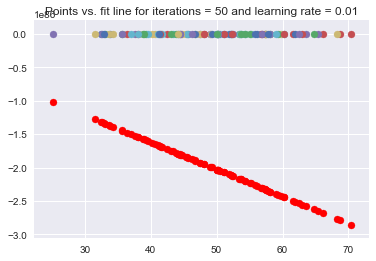

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = -2.18582479254e+167, m = -1.11211329297e+169, error = inf


/Users/kathyli/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


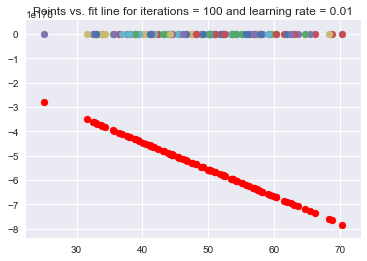

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 10 iterations b = -2.69361400268e+25, m = -1.37046846057e+27, error = 4.68209828797e+57


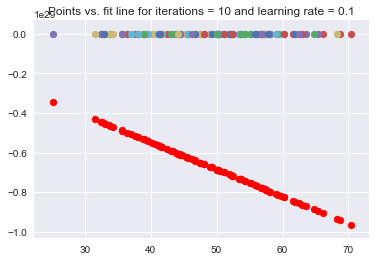

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 50 iterations b = -1.98624075315e+133, m = -1.01056807122e+135, error = 2.54585450942e+273


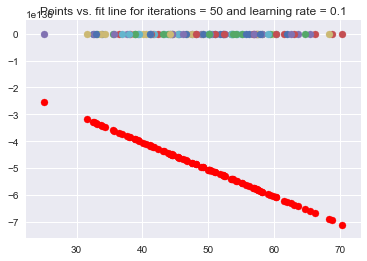

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running...
After 100 iterations b = -1.35722717765e+268, m = -6.90535852188e+269, error = inf


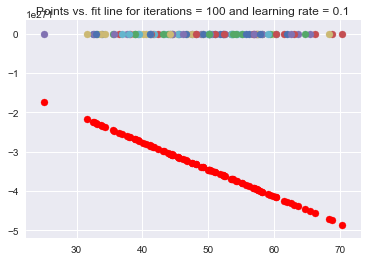

In [21]:
#plot results of fit line vs. actual data for different learning rates and iteration numbers to showcase how
#too high learning rates = low precision (i.e., solutions don't converge to actual data)
learning_rates = np.logspace(-6, -1, 6)

for rate in learning_rates:
    run(10, rate)
    plt.title('Points vs. fit line for iterations = 10 and learning rate = '+str(rate))
    plt.show()
    
    run(50, rate)
    plt.title('Points vs. fit line for iterations = 50 and learning rate = '+str(rate))
    plt.show()
    
    run(100, rate)
    plt.title('Points vs. fit line for iterations = 100 and learning rate = '+str(rate))
    plt.show()

The plots above give us a sense of how learning rate affects convergence of the gradient descent method of fitting our data to a $y = mx + b$ line by showcasing convergence for a given learning rate (we do this by plotting the fit line vs. actual data for 10, 50, and 100 iterations). Gradient descent searches for our optimal $m,b$ parameters that minimize our cost function (in this case, sum of squared residuals, or $\sum_{i=1}^n (y - (mx + b))^ 2$, where $y$ is our actual data, and $mx + b$ is our fit line) by moving in the direction of steepest descent with a step size determined by the learning rate. 

We see that for lower learning rates, we converge less quickly (as indicated by the red line moving more and more slowly upwards to fit the data better in the first set of plots), and in some cases are not able to actually converge well to the actual data in 100 iterations (as seen in the first set of plots). That is, this slow rate of convergence may be an issue for computationally intensive data fits where we can't afford to run the required number of iterations needed for convergence. There appears to be a "sweet spot" learning rate where we our method converges in less time (i.e., a learning rate of 0.0001 looks like it may be a good choice here). In contrast, we see that for too high of learning rates, gradient descent doesn't converge - we can see this because the red line doesn't fit the data at all, and this behavior doesn't improve with higher iteration counts. We can interpret this as our step size being too large, and thus that we are overshooting the minimum value when we take a step in the direction of steepest descent and are never able to find our optimal parameters or converge; in fact, we oscillate back and forth.

These plots give us a visual sense of error at a particular point in time (i.e., at a given iteration) - they provide us with a picture of how far the fit line is from the data. 

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

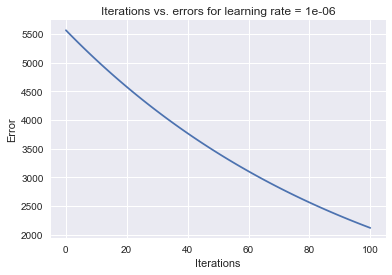

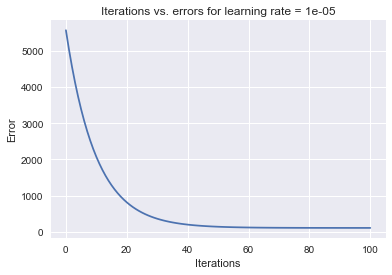

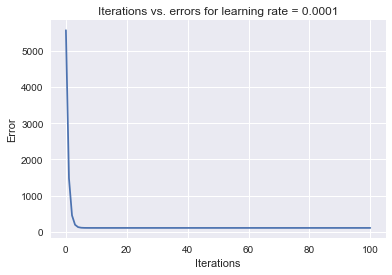

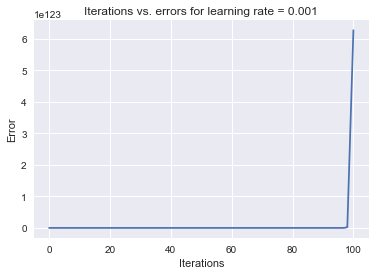

/Users/kathyli/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


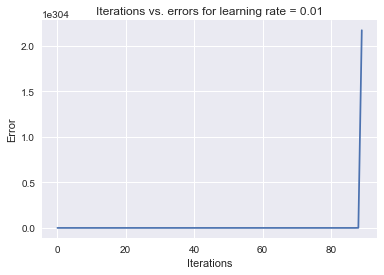

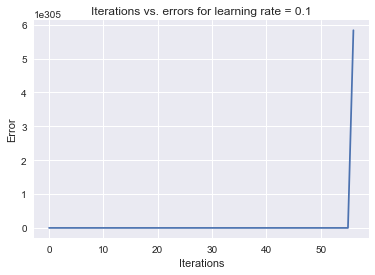

In [22]:
#specify iteration counts and learning rates
iterations = np.linspace(0, 100, 100, dtype=int)
learning_rates = np.logspace(-6, -1, 6)

#plot error vs. iteration for different learning rates
for rate in learning_rates:
    errors = []
    for num in iterations:
        points = genfromtxt("data.csv", delimiter=",")
        [b, m] = gradient_descent_runner(points, 0, 0, rate, num)
        errors.append(compute_error_for_line_given_points(b, m, points))
    plt.plot(iterations, errors)
    plt.title('Iterations vs. errors for learning rate = ' + str(rate))
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.show()

Similarly to the previous part, we note that when we plot the iteration number versus error for different learning rates for our gradient descent method, for learning rates that are too large, we lose precision - that is, we can imagine that we are taking too large of steps in our descent, and thus 'skipping over' the minimum of our cost function (in this case, the error between $y = mx+b$ and the actual data). That is, when our learning rate is too large (in our case, it looks like > 0.001), our error increases rapidly (towards $\infty$) as we increase our iteration count - this can be explained by the fact that we are overshooting our minimum and thus continuing to search fruitlessly in a parameter space that doesn't contain the optimal value; we overshoot and oscillate back and forth. We also see that in the last few plots, as we increase the learning rate further beyond the optimal threshold, we shoot off to infinity in fewer iterations (i.e., it only takes ~55 iterations to overshoot in the last plot, as compared to ~85 in the plot above) - this is because we are taking larger step sizes, and thus overshoot the minimum more quickly. At first we may oscillate back and forth close to the solution (but not exactly converging to it), and then we shoot off.  

On the other hand, when our learning rate is too small (i.e., in the first plot), we are not able to converge very well in the 100 iterations (our error is still ~2000 in the first plot). However, when our learning rate is in the optimal range of not too small nor too large (in our case, it looks like between 0.00001 and 0.0001, for the values we tested), we see that our method is able to converge, albeit at varying speeds - that is, as we increase the number of iterations, the error decreases at varying rates - this is because we are taking adequately small steps, and with each additional iteration, we are able to get closer to a minimum (and thus approximate our data more accurately) without overshooting it. We see that in the second plot, we are able to converge, but it takes ~60 iterations; however, when we decrease the learning rate further, as in the third plot, we are able to converge in ~5 iterations. Furthermore, we note that there appears to be an optimal learning rate; for us, it looks to be around 0.001 - with this rate, we are able to achieve the smallest error with the least number of iterations. 

These plots give us a sense of how error evolves over time, and thus we can imagine these plots as a summary of a set of the plots we have in the previous question (i.e., the first plot in this part represents the error over many different iteration counts).